In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 8 Teco Customer Churn Anlaysis Python\Customer Churn.csv")

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [60]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.duplicated().sum()

0

In [13]:
df['customerID'].duplicated().sum()

0

In [62]:
def conv(value):
    if value == 0:
        return "no"
    else:
        return "yes"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [63]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64

## Count of Customers by Churn

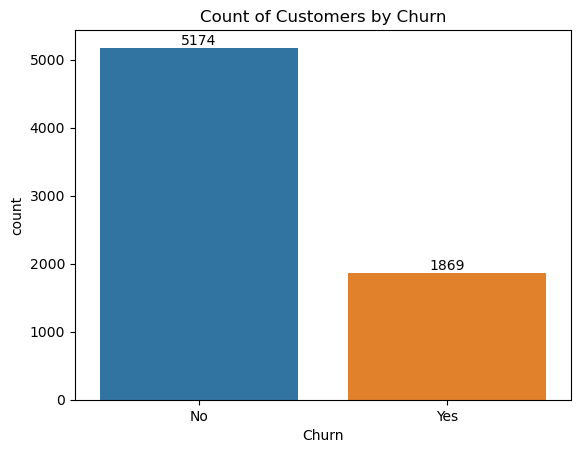

In [28]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.savefig('Images/Count of Customer by Churn.jpg')
plt.show()

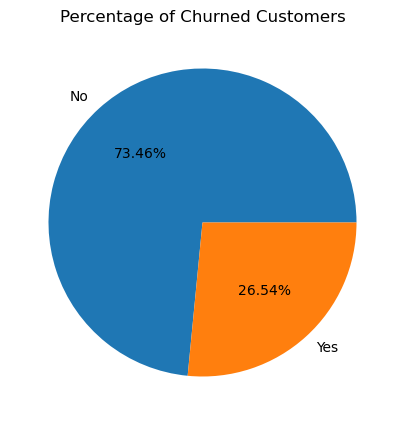

In [32]:
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.figure(figsize = (8,5))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 12)
plt.savefig('Images/Percentage of Churned Customers.jpg')
plt.show()

### 26.54% of our customers have churned out.!

## Churn by Gender

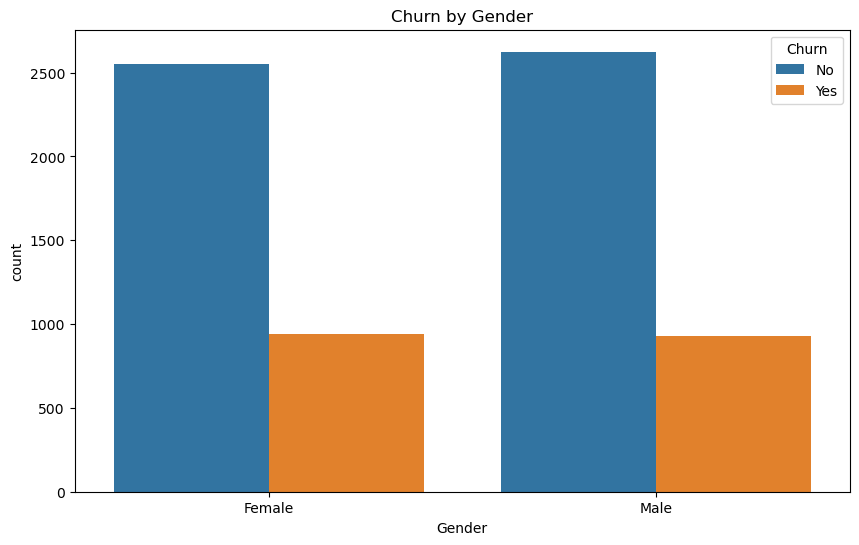

In [40]:
plt.figure(figsize = (10,6))

sns.countplot(x="gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.savefig('Images/Churn by Gender.jpg')
plt.show()

In [36]:
df.groupby(['gender','Churn'],as_index = False)['Churn'].count()

,gender,Churn
0,Female,2549
1,Female,939
2,Male,2625
3,Male,930


## By Senior Citizen

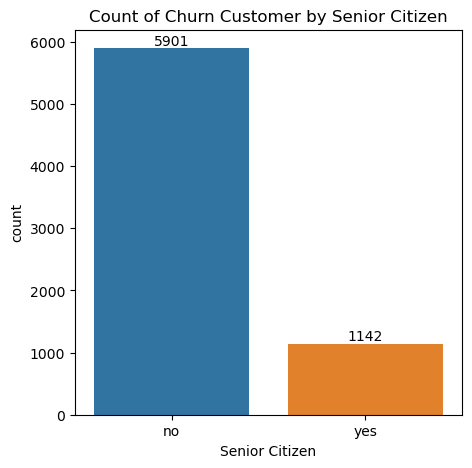

In [66]:
plt.figure(figsize = (5,5))

ax = sns.countplot(x="SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])

plt.title("Count of Churn Customer by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.savefig('Images/Churn by SeniorCitizen.jpg')
plt.show()

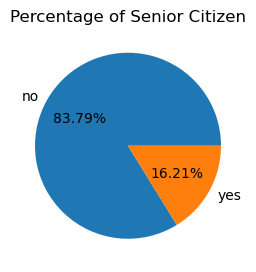

In [79]:
gb = df.groupby("SeniorCitizen").agg({'Churn':"count"})

plt.figure(figsize = (3,4))
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Senior Citizen", fontsize = 12)
plt.savefig('Images/Percentage of SeniorCitizen.jpg')
plt.show()

In [72]:
counts = df.groupby(['SeniorCitizen','Churn'])['Churn'].count()

percentages = counts.groupby(level=0).apply(lambda x: (x / x.sum()) * 100)

# Display as a DataFrame
#percentages = percentages.reset_index(name='Percentage')
percentages

SeniorCitizen  SeniorCitizen  Churn
no             no             No       76.393832
                              Yes      23.606168
yes            yes            No       58.318739
                              Yes      41.681261
Name: Churn, dtype: float64

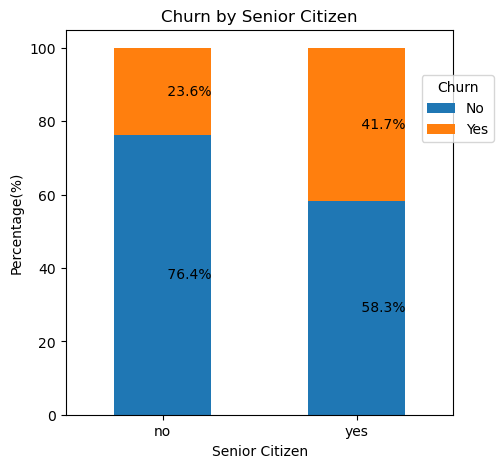

In [69]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

fig, ax = plt.subplots(figsize = (5,5))

total_counts.plot(kind = 'bar', stacked = True, ax = ax) 

# Add percentage lable on the bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height: .1f}%', va='center')


plt.title("Churn by Senior Citizen")
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage(%)')
plt.legend(title = 'Churn', bbox_to_anchor = (0.9, 0.9))
plt.xticks(rotation = 0)
plt.savefig('Images/Churn % by SeniorCitizen.jpg')
plt.show()

### Comparatively a greater percentage of Senior Citizen have churned

## Tenure

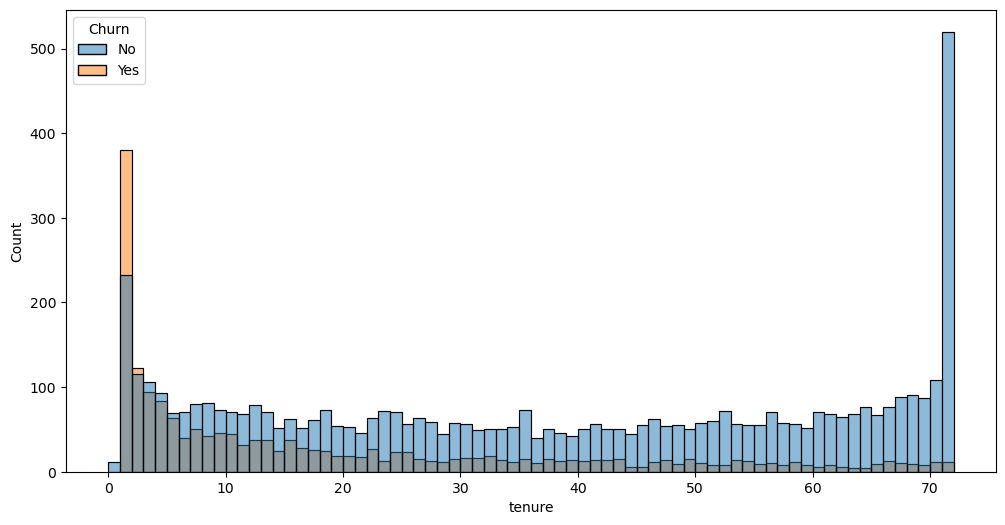

In [82]:
plt.figure(figsize = (12,6))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.savefig('Images/Churn by tenure.jpg')
plt.show()

<b> People who have used our servies for long time have staued and people who are new to our servies i.e 1/2 months have churned </b>

## Based on Contract

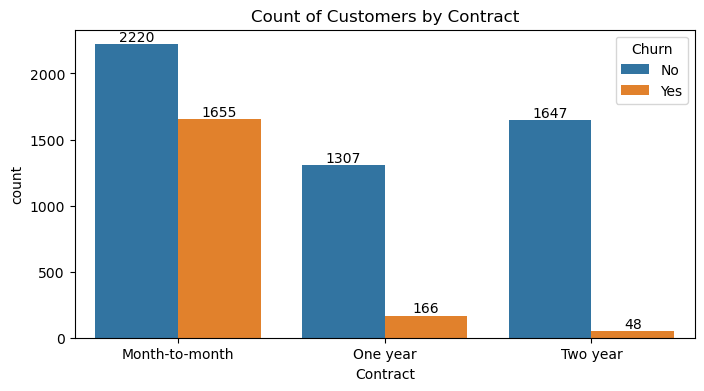

In [97]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x ="Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.savefig('Images/Customers by Contract.jpg')
plt.show()

<b> People having month-to-month contract are more likely to churn then other form of contract.

In [85]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

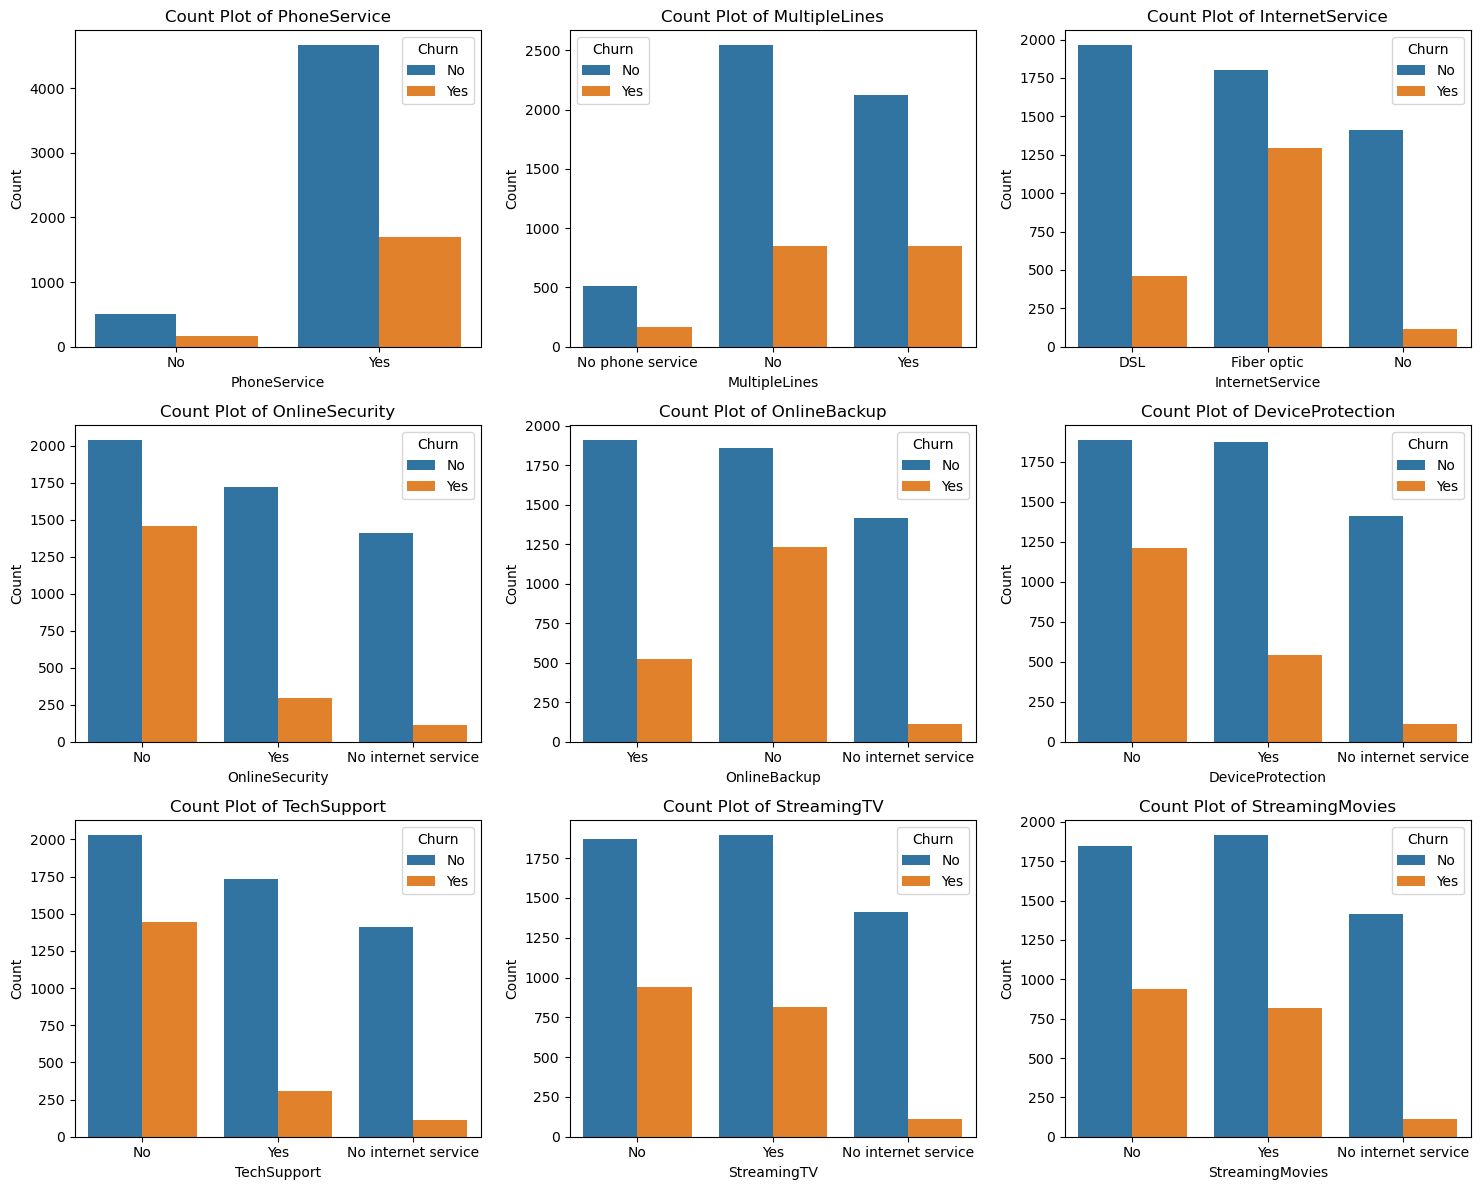

In [100]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols -1 ) // n_cols

#Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x = col, data = df, ax = axes[i], hue= df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.savefig('Images/Countplot.jpg')
plt.show()

<b>The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.</b>

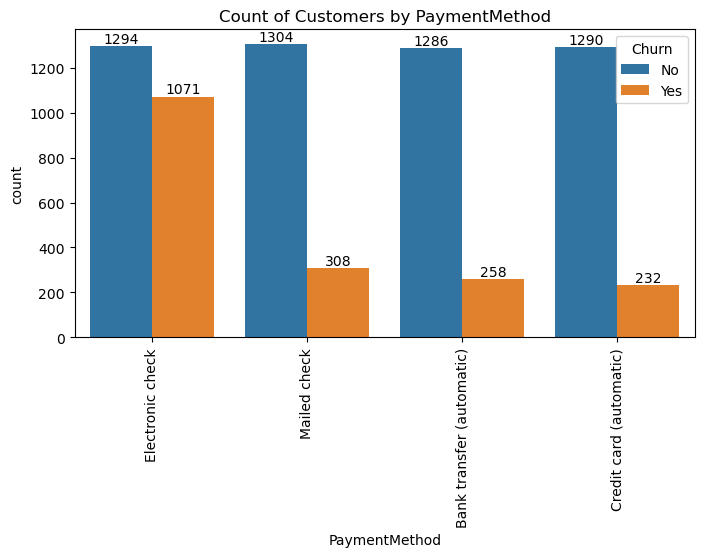

In [99]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x ="PaymentMethod", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation = 90)
plt.savefig('Images/Customers by PaymentMethod')
plt.show()

<b>Customer is likely to churn when they're using electronic check as a payment method.</b>